<a href="https://colab.research.google.com/github/NehaNeha417/Self_project/blob/main/Eng_to_French.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from collections import Counter
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import STOPWORDS, WordCloud
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, LSTM

In [61]:
# sep = '\t' is used because the data given is tab seperated data
df_english = pd.read_csv('small_vocab_en.csv', sep='\t', names=['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep='\t', names=['french'])

In [62]:
df_english.shape

(137860, 1)

In [63]:
df_french.shape

(137860, 1)

In [64]:
print(df_english.isna().sum())
df_french.isna().sum()

english    0
dtype: int64


french    0
dtype: int64

In [65]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [66]:
df_english

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."
...,...
137855,"france is never busy during march , and it is ..."
137856,"india is sometimes beautiful during spring , a..."
137857,"india is never wet during summer , but it is s..."
137858,"france is never chilly during january , but it..."


In [67]:
df_french

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."
...,...
137855,"la france est jamais occupée en mars , et il e..."
137856,"l' inde est parfois belle au printemps , et il..."
137857,"l' inde est jamais mouillé pendant l' été , ma..."
137858,"la france est jamais froid en janvier , mais i..."


In [68]:
new_df = pd.concat([df_english , df_french],axis=1)
new_df.head(10)

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
5,"his favorite fruit is the orange , but my favo...","son fruit préféré est l'orange , mais mon préf..."
6,"paris is relaxing during december , but it is ...","paris est relaxant en décembre , mais il est g..."
7,"new jersey is busy during spring , and it is n...","new jersey est occupé au printemps , et il est..."
8,"our least liked fruit is the lemon , but my le...","notre fruit est moins aimé le citron , mais mo..."
9,the united states is sometimes busy during jan...,"les états-unis est parfois occupé en janvier ,..."


In [69]:
print('Total English record=', len(new_df['english']))
print('Total French record=', len(new_df['french']))

Total English record= 137860
Total French record= 137860


In [70]:
# re.sub will search for the substring given in first argument 
# of text given in third argument with the substring given in second argument 
def remove_punc(text):
  return re.sub('[!,.;:?/"#@^]','',text)

#1st method to call the function remove_punc()
new_df['english']= new_df['english'].apply(remove_punc)
new_df['french']= new_df['french'].apply(remove_punc)
new_df['english']

0         new jersey is sometimes quiet during autumn  a...
1         the united states is usually chilly during jul...
2         california is usually quiet during march  and ...
3         the united states is sometimes mild during jun...
4         your least liked fruit is the grape  but my le...
                                ...                        
137855    france is never busy during march  and it is s...
137856    india is sometimes beautiful during spring  an...
137857    india is never wet during summer  but it is so...
137858    france is never chilly during january  but it ...
137859    the orange is her favorite fruit  but the bana...
Name: english, Length: 137860, dtype: object

In [71]:
# 2nd method to call the function remove_punc()
# for doc in new_df['english']:
#   doc = remove_punc(doc)                              ## WRONG
# new_df['english']

maketrans() function is used to construct the transition table i.e specify the list of characters that need to be replaced in the whole string or the characters that need to be deleted from the string.
Translate function uses the translation mapping specified using the maketrans() to translate the characters in the string translate().
string.punctuation is a pre-initialized string used as string constant. In Python, string.punctuation will give the all sets of punctuation


In [72]:
# #Another method to remove punctuation
# import string
# for doc in new_df['english']:                                
#   line = doc
#   table = line.maketrans('','',string.punctuation)
#   doc = line.translate(table)

# new_df['english']



In [73]:
eng_word_list = []
french_word_list = []

# def get_unique_words(text, word_list):
#   for word in text.split():
#     if word not in word_list:
#       word_list.append(word)
#   return word_list

# new_df['english'].apply(lambda text:get_unique_words(text,eng_word_list))
# new_df['french'].apply(lambda text:get_unique_words(text,french_word_list))

In [75]:
def unique_words_list(lines, word_list):
  for line in lines:
    for word in line.split():
      if word not in word_list:
        word_list.append(word)
  return word_list
  
eng_words =  unique_words_list(new_df['english'], eng_word_list)
fr_words = unique_words_list(new_df['french'], french_word_list)
total_eng_words = len(eng_words)
total_fr_words = len(fr_words)

print(total_eng_words)
print(total_fr_words)

199
350


In [76]:
##  Another method to count unique words using set

# eng_1 = set()
# fr_1 = set()

# def unique_words(series,set1):
#   #vocab = set()
#   for lines in series:
#     for words in lines.split():
#       print(words)
#       set1.update(words)
#   return set1

# unique_eng = unique_words(new_df['english'],eng_1) 
# print(len(unique_eng))
# unique_french = unique_words(new_df['french'],fr_1)
# print(len(unique_french))

In [77]:
def get_all_words(lines,word_list):
  for line in lines:
    for word in line.split():
      word_list.append(word)
  return word_list

eng_new_list = []
french_new_list = []

eng_words =  get_all_words(new_df['english'], eng_new_list)
fr_words = get_all_words(new_df['french'], french_new_list)
#eng_words


In [78]:
# Another method to count all the words

# words = []
# for line in new_df['english']:
#     for word in line.split():
#       words.append(word)
# words

In [79]:
all_eng_words = Counter(eng_words)                 # Counter is used to get all words and their counts. Counter returns a dictionary
all_french_words = Counter(fr_words)            # Counter takes list of all the words


In [80]:
all_eng_words

Counter({'a': 1944,
         'am': 24,
         'and': 59850,
         'animal': 2304,
         'animals': 768,
         'apple': 4848,
         'apples': 5844,
         'april': 8954,
         'are': 870,
         "aren't": 36,
         'august': 8789,
         'automobile': 1944,
         'autumn': 9004,
         'banana': 4848,
         'bananas': 5844,
         'bear': 192,
         'bears': 64,
         'beautiful': 8915,
         'been': 36,
         'between': 540,
         'big': 1016,
         'bird': 192,
         'birds': 64,
         'black': 972,
         'blue': 972,
         'busy': 8791,
         'but': 63987,
         'california': 11250,
         'car': 1944,
         'cat': 192,
         'cats': 64,
         'chilly': 8770,
         'china': 10953,
         'chinese': 312,
         'cold': 8878,
         'december': 8945,
         'did': 204,
         "didn't": 60,
         'difficult': 260,
         'dislike': 4444,
         'disliked': 648,
         'dislikes': 731

Operator.itemgetter() takes keys of dictionaries and converts them into tuples. It reduces overhead and is faster and more efficient

In [81]:
# to sort list of dictionary using values
eng_words_sorted = sorted(all_eng_words.items(), key=operator.itemgetter(1), reverse=True)
french_words_sorted = sorted(all_french_words.items(), key=operator.itemgetter(1), reverse=True)

In [82]:
eng_words_sorted

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [83]:
eng_word = []
eng_count = []
for key,value in all_eng_words.items():
  eng_word.append(key)
  eng_count.append(value)
print(eng_word)
print(eng_count)


['new', 'jersey', 'is', 'sometimes', 'quiet', 'during', 'autumn', 'and', 'it', 'snowy', 'in', 'april', 'the', 'united', 'states', 'usually', 'chilly', 'july', 'freezing', 'november', 'california', 'march', 'hot', 'june', 'mild', 'cold', 'september', 'your', 'least', 'liked', 'fruit', 'grape', 'but', 'my', 'apple', 'his', 'favorite', 'orange', 'paris', 'relaxing', 'december', 'busy', 'spring', 'never', 'our', 'lemon', 'january', 'warm', 'lime', 'her', 'banana', 'he', 'saw', 'a', 'old', 'yellow', 'truck', 'india', 'rainy', 'that', 'cat', 'was', 'most', 'loved', 'animal', 'dislikes', 'grapefruit', 'limes', 'lemons', 'february', 'china', 'pleasant', 'october', 'wonderful', 'nice', 'summer', 'france', 'may', 'grapes', 'mangoes', 'their', 'mango', 'pear', 'august', 'beautiful', 'apples', 'peaches', 'feared', 'shark', 'wet', 'dry', 'we', 'like', 'oranges', 'they', 'pears', 'she', 'little', 'red', 'winter', 'disliked', 'rusty', 'car', 'strawberries', 'i', 'strawberry', 'bananas', 'going', 'to'

plotly is used to generate interactive plots. It is used for interactive data visualisation.
The plotly.express module contains functions that can create entire figures at once.
Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.
Plotly Express provides more than 30 functions for creating different types of figures

In [84]:
# plotly.express can create entire figure at once. It is recommended starting point 
# for creating most common figures.
fig = px.bar(x = eng_word, y = eng_count)               
fig.show()                                              

In [85]:
french_word = []
french_count = []
for key,value in all_french_words.items():
  french_word.append(key)
  french_count.append(value)



In [86]:
fig = px.bar(x=french_word, y=french_count)
fig.show()

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
It is widely used for analyzing data from social network websites.

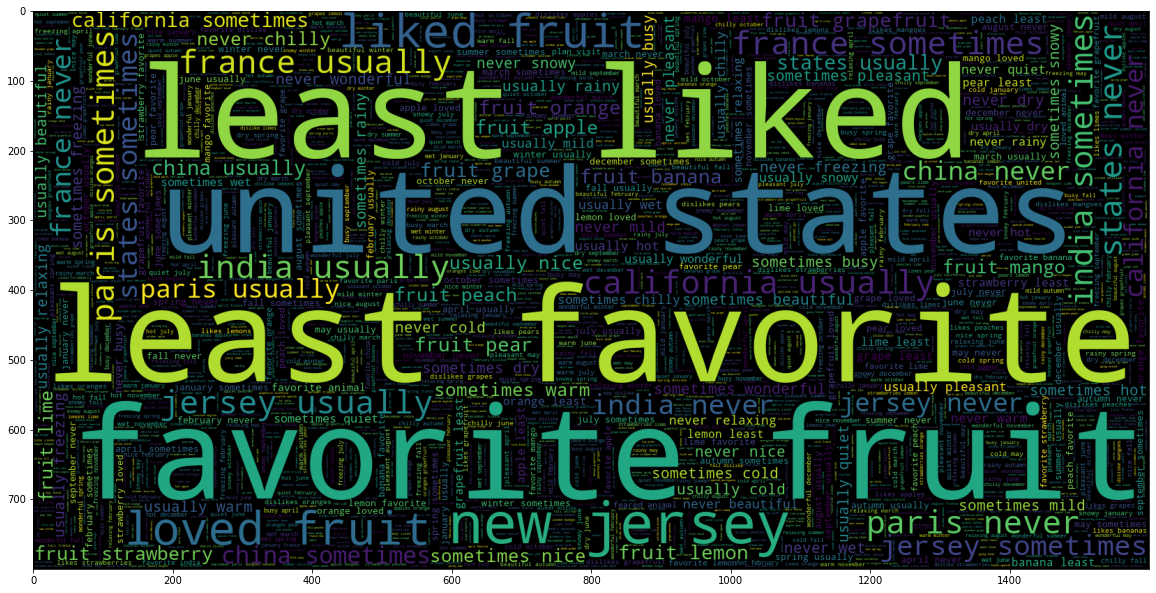

In [87]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(new_df['english']))
plt.imshow(wc)

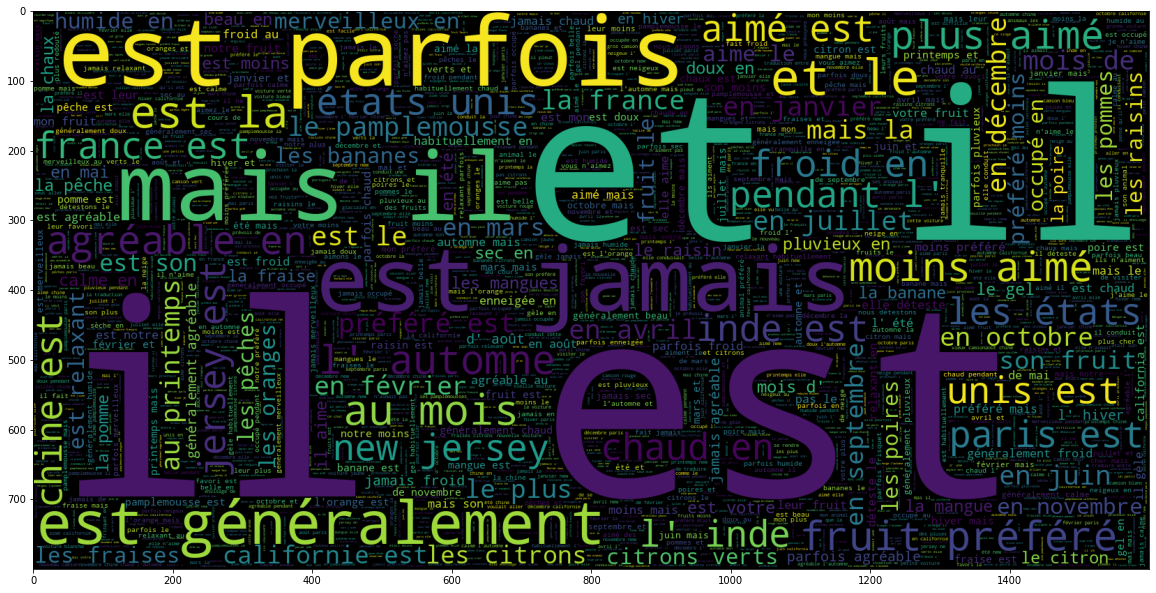

In [88]:
plt.figure(figsize=(20,20))               # here, the size of the word represents the frequency as well as the importans of the word
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(new_df['french']))
plt.imshow(wc)

In [89]:
def max_length(text):
  maximum = []
  for lines in text:
    num = lines.split()
    maximum.append(len(num))
  max_len = max(maximum) 
  return max_len

eng_max = max_length(new_df['english'])
french_max = max_length(new_df['french'])

print(eng_max)
print(french_max)


15
21


texts_to_sequences() transforms each text in texts to a sequence of integers.

Only top num_words-1 most frequent words will be taken into account. Only words known by the tokenizer will be taken into account.

In [118]:
def tokenize_and_pad(text,max_len):
  t = Tokenizer()
  # to Updates internal vocabulary based on given list of texts
  t.fit_on_texts(text)
  # to convert each text in texts to a sequence of integers
  sequence =t.texts_to_sequences(text)
  pad_seq = pad_sequences(sequence,maxlen=max_len,padding='post')
  return t, sequence, pad_seq

In [119]:
x_tokenizer,x_sequence, x_padded = tokenize_and_pad(new_df['english'],eng_max)  # bcoz we want both input and output to be of same length
y_tokenizer,y_sequence, y_padded = tokenize_and_pad(new_df['french'],french_max)

In [93]:
print('The tokenizer for documents:\n', new_df['english'][-1:], 'is: \n', x_padded[-1:])

The tokenizer for documents:
 137859    the orange is her favorite fruit  but the bana...
Name: english, dtype: object is: 
 [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0]]


In [94]:
print('The tokenizer for documents:\n', new_df['french'][-1:], 'is: \n', y_padded[-1:])

The tokenizer for documents:
 137859    l'orange est son fruit préféré  mais la banane...
Name: french, dtype: object is: 
 [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0]]


In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size =0.1)

In [96]:
# vocab_size = (no. of words + 1) bcoz 0 is resevered for padding which is not used during converting words to number sequences
# total_eng_words gives the total number of unique words in english  
eng_vocab = total_eng_words + 1    
fr_vocab = total_fr_words + 1
model = Sequential()
# to convert positive integers (indexes) into dense vectors of fixed size.
model.add(Embedding(eng_vocab, 256, input_length=eng_max, mask_zero=True))
# LSTM(encoder)
model.add(LSTM(256))     # This LSTM layer has activation = tanh and recurrent_activation = sigmoid
# to repeat the input to 21 times i.e french_max
model.add(RepeatVector(french_max))     # it will return the 3D tensor as output
# LSTM(decoder)
model.add(LSTM(256, return_sequences=True))        #return_sequences = True will return the last output in output_sequences
# To allow to apply a layer to every temporal slice of an input and the dimension of index one will be considered to be the temporal dimension.
model.add(TimeDistributed(Dense(fr_vocab, activation='softmax')))     
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 256)           51200     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 21, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 21, 256)           525312    
_________________________________________________________________
time_distributed (TimeDistri (None, 21, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


RepeatVector Converts the output of LSTM(encoder) to 3D array.
It repeats the input to desired no of times to simply convert 2D array to 3D array.

In [97]:
y_train = np.expand_dims(y_train, axis=2)
y_train.shape

(124074, 21, 1)

In [98]:
model.fit(x_train, y_train, batch_size=1024, validation_split=0.1, epochs=10)

Epoch 1/10
110/110 [==============================] - 319s 3s/step - loss: 2.9155 - accuracy: 0.4464 - val_loss: 2.3105 - val_accuracy: 0.4899
Epoch 2/10
110/110 [==============================] - 325s 3s/step - loss: 2.0540 - accuracy: 0.5351 - val_loss: 1.7640 - val_accuracy: 0.5640
Epoch 3/10
110/110 [==============================] - 322s 3s/step - loss: 1.6193 - accuracy: 0.5865 - val_loss: 1.4867 - val_accuracy: 0.6074
Epoch 4/10
110/110 [==============================] - 324s 3s/step - loss: 1.4011 - accuracy: 0.6221 - val_loss: 1.3039 - val_accuracy: 0.6425
Epoch 5/10
110/110 [==============================] - 318s 3s/step - loss: 1.2166 - accuracy: 0.6596 - val_loss: 1.1328 - val_accuracy: 0.6808
Epoch 6/10
110/110 [==============================] - 317s 3s/step - loss: 1.0637 - accuracy: 0.6972 - val_loss: 1.0297 - val_accuracy: 0.7053
Epoch 7/10
110/110 [==============================] - 319s 3s/step - loss: 0.9399 - accuracy: 0.7274 - val_loss: 0.8948 - val_accuracy: 0.7372

In [99]:
model.save('eng_to_fr_weights.h5')

In [100]:
x_test.shape

(13786, 15)

In [101]:
x_test

array([[  5,  20,  21, ...,  63,   2,  37],
       [ 17,  23,   1, ...,   2,  33,   0],
       [ 29,  14,  15, ...,   5,  82,   0],
       ...,
       [ 19,   1,  64, ...,   0,   0,   0],
       [ 27, 133,  81, ...,   0,   0,   0],
       [ 24,   1,   9, ...,   0,   0,   0]], dtype=int32)

In [102]:
x_test[0]

array([ 5, 20, 21,  1, 10, 67,  4, 34,  6,  3,  1,  8, 63,  2, 37],
      dtype=int32)

In [103]:
y_predict = model.predict(x_test)

In [104]:
y_predict

array([[[1.36506619e-08, 3.56462215e-06, 1.13596099e-09, ...,
         3.48222184e-09, 4.23784519e-09, 3.77218790e-09],
        [3.49376118e-11, 3.24703906e-05, 3.65116271e-12, ...,
         1.35194278e-11, 1.46474603e-11, 1.23740081e-11],
        [6.19437279e-11, 1.02625312e-02, 3.58219843e-11, ...,
         1.27010546e-11, 1.73778752e-11, 6.73782818e-12],
        ...,
        [9.99580801e-01, 4.76250625e-06, 8.63602691e-05, ...,
         1.65003722e-11, 1.69851962e-11, 2.72327928e-12],
        [9.99623299e-01, 4.91132096e-06, 7.55748479e-05, ...,
         1.37937647e-11, 1.36915375e-11, 2.24699079e-12],
        [9.99632359e-01, 4.94857386e-06, 7.33938068e-05, ...,
         1.28838563e-11, 1.26986104e-11, 2.08849691e-12]],

       [[1.66939138e-08, 3.72753675e-06, 3.60675378e-09, ...,
         4.69739625e-09, 4.56131222e-09, 3.44248763e-09],
        [4.64114525e-10, 1.30840822e-03, 1.01394698e-10, ...,
         1.23266480e-10, 9.75590650e-11, 5.88494184e-11],
        [2.29461561e-09, 

In [123]:
def prediction(x, x_tokenizer = x_tokenizer,y_tokenizer = y_tokenizer):
  predictions = model.predict(x)[0]
  id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
  id_to_word[0] = ''
  return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [124]:
def pad_to_text(padded,tokenizer):
  id_to_word = {id: word for word, id in tokenizer.word_index.items()}
  id_to_word[0] = ''
  return ' '.join([id_to_word[j] for j in padded])

In [128]:
for i in range(5):
  print('Original English Words- {}\n'.format(pad_to_text(x_test[i],x_tokenizer)))
  print('Original French words- {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French Words- {}\n'.format(prediction(x_test[i:i+1])))

Original English Words- the united states is never quiet during june but it is sometimes rainy in winter

Original French words- les états unis est jamais tranquille en juin mais il est parfois pluvieux en hiver      

Predicted French Words- les états unis est jamais froid en juin mais il est parfois en en hiver      

Original English Words- new jersey is sometimes cold during february and it is usually dry in fall 

Original French words- new jersey est parfois froid en février et il est généralement sec à l' automne      

Predicted French Words- new jersey est parfois froid en février et il est généralement chaud à l' automne      

Original English Words- your most loved fruit is the strawberry but their most loved is the grape 

Original French words- votre fruit le plus aimé est la fraise mais leur plus aimé est le raisin      

Predicted French Words- son fruit le plus aimé est la poire mais son plus aimé est le raisin      

Original English Words- new jersey is never mild du